ATIENZA, KURT CYDRICK A.

21-00415

CPE-4102

LABORATORY 4

A. NLP Task and Dataset (Spam Detection)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/purusinghvi/email-spam-classification-dataset/versions/1


In [ ]:
import os

# List all files in the dataset directory
print("Dataset files:", os.listdir(path))


Dataset files: ['combined_data.csv']


In [ ]:
import pandas as pd

file_path = path + "/combined_data.csv"
data = pd.read_csv(file_path)

# Preview the data
print(data.head())
print(data.info())



   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None


B. Preprocessing

In [ ]:
import re

def clean_text(text):
    # Remove special characters, numbers, and extra spaces, and convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.lower()

# Apply cleaning
data['text_cleaned'] = data['text'].apply(clean_text)


In [ ]:
import nltk

# Force re-download of 'punkt'
nltk.download('punkt', force=True)

import os
print("NLTK data directory:", nltk.data.path)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK data directory: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = vectorizer.fit_transform(data['text_cleaned']).toarray()
y = data['label']


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource for sentence tokenization

# Initialize stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean text, remove stopwords, and apply stemming/lemmatization
def clean_text(text, method='lemmatization'):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming or lemmatization
    if method == 'stemming':
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == 'lemmatization':
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply cleaning to the dataset (choose method: 'stemming' or 'lemmatization')
data['text_cleaned'] = data['text'].apply(lambda x: clean_text(x, method='lemmatization'))

# Preview the cleaned text
print(data[['text', 'text_cleaned']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  ounce feather bowl hummingbird opec moment ala...   
1  wulvob get your medircations online qnb ikud v...   
2   computer connection from cnn com wednesday es...   
3  university degree obtain a prosperous future m...   
4  thanks for all your answers guys i know i shou...   

                                        text_cleaned  
0  ounce feather bowl hummingbird opec moment ala...  
1  wulvob get medircations online qnb ikud viagra...  
2  computer connection cnn com wednesday escapenu...  
3  university degree obtain prosperous future mon...  
4  thanks answer guy know checked rsync manual wo...  


In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C. Train the Model

USE OF LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9858893316156865
Testing Accuracy: 0.9836428999400839


USE OF NEURAL NETWORK

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical for NN
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_test, y_test_categorical))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9448 - loss: 0.1609 - val_accuracy: 0.9869 - val_loss: 0.0386
Epoch 2/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9874 - val_loss: 0.0400
Epoch 3/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9957 - loss: 0.0145 - val_accuracy: 0.9872 - val_loss: 0.0430
Epoch 4/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9974 - loss: 0.0091 - val_accuracy: 0.9863 - val_loss: 0.0566
Epoch 5/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9859 - val_loss: 0.0715
Epoch 6/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9857 - val_loss: 0.0687
Epoch 7/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9853 - val_loss: 0.0838
Epoch 8/10
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9991 -

D. Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7938
           1       0.98      0.99      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

[[7756  182]
 [  91 8661]]


Visualization

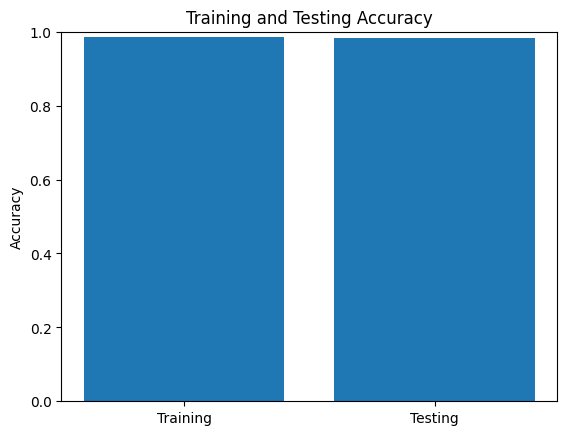

In [ ]:
import matplotlib.pyplot as plt

# Instead of using 'history', we'll directly plot the training and test accuracy

# Assuming you have train_accuracy and test_accuracy from your Logistic Regression model

# Replace train_accuracy and test_accuracy with your actual values if needed

train_accuracy = 0.9858893316156865
test_accuracy = 0.9836428999400839

labels = ['Training', 'Testing']
accuracy_values = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_values)
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# You can similarly plot other metrics like precision, recall, F1-score, etc.
# using the classification_report and confusion_matrix obtained earlier.

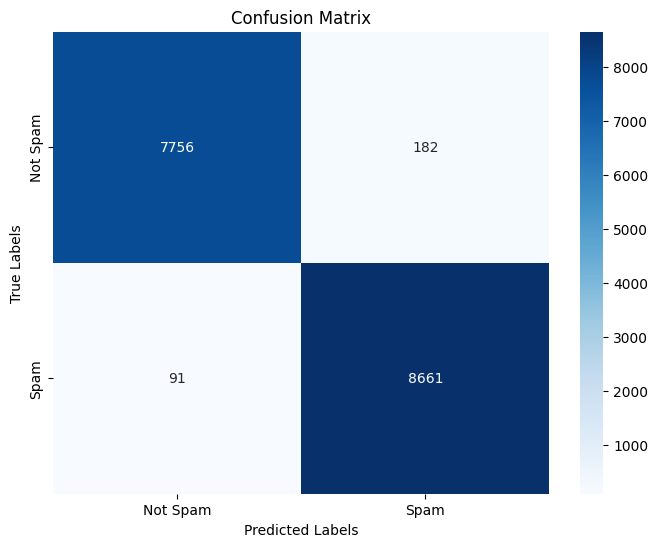

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


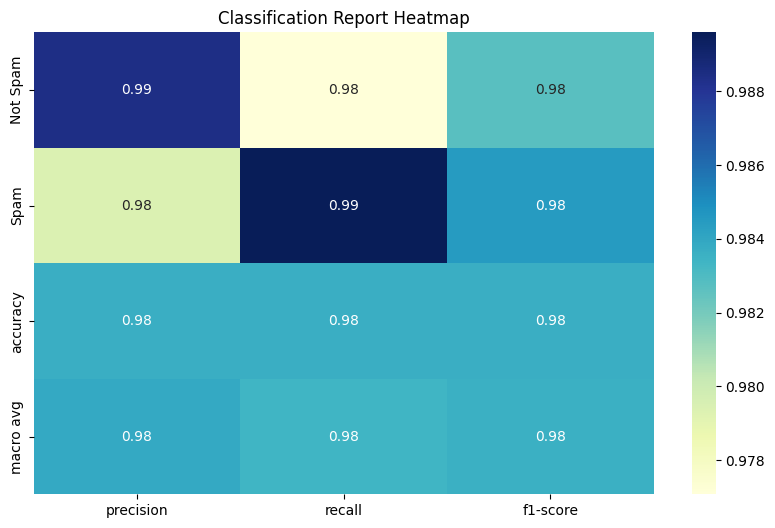

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'], output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title('Classification Report Heatmap')
plt.show()


E. Implement and Visualize Results

In [ ]:
# Example unseen data
new_emails = [
    "Win a brand-new car! Click here to claim your prize!",
    "Meeting scheduled at 2 PM. Don't forget to prepare the report.",
    "Exclusive offer for you! Get 50% off on all purchases. Limited time only!"
]

# Clean and preprocess the new emails
new_emails_cleaned = [clean_text(email) for email in new_emails]  # Use your `clean_text` function
new_emails_vectorized = vectorizer.transform(new_emails_cleaned).toarray()

# Predict labels for new emails
new_predictions = model.predict(new_emails_vectorized)

# Print predictions
for i, email in enumerate(new_emails):
    print(f"Email: {email}")
    print(f"Predicted Label: {'Spam' if new_predictions[i] == 1 else 'Not Spam'}")
    print()


Email: Win a brand-new car! Click here to claim your prize!
Predicted Label: Spam

Email: Meeting scheduled at 2 PM. Don't forget to prepare the report.
Predicted Label: Not Spam

Email: Exclusive offer for you! Get 50% off on all purchases. Limited time only!
Predicted Label: Spam



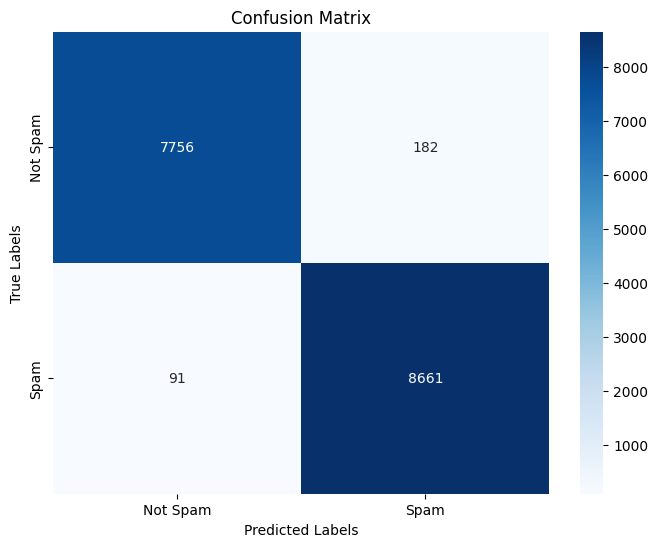

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


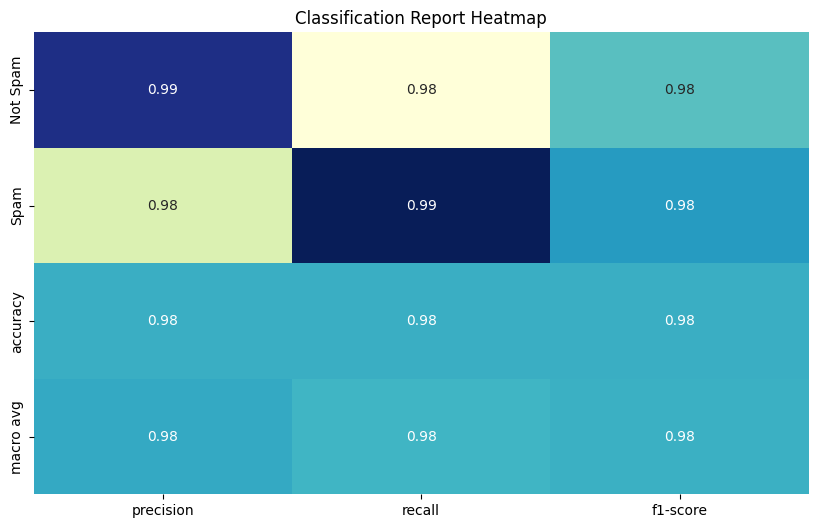

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'], output_dict=True)

# Convert report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title('Classification Report Heatmap')
plt.show()
